In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix

import joblib

In [2]:
df=pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
df


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [4]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
print(df["Gender"].unique())


['Female' 'Male']


In [9]:
print(df["Subscription Type"].unique())


['Standard' 'Basic' 'Premium']


In [10]:
print(df["Contract Length"].unique())


['Annual' 'Monthly' 'Quarterly']


In [11]:
numeric_range = df.describe().loc[["min", "max"]]
print(numeric_range)

     CustomerID   Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
min         2.0  18.0     1.0              1.0            0.0            0.0   
max    449999.0  65.0    60.0             30.0           10.0           30.0   

     Total Spend  Last Interaction  Churn  
min        100.0               1.0    0.0  
max       1000.0              30.0    1.0  


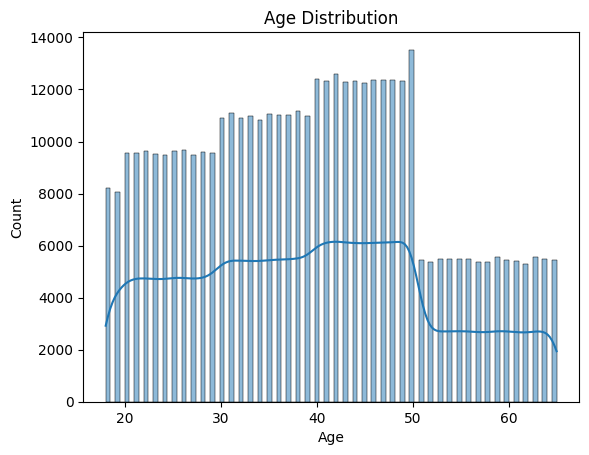

In [12]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

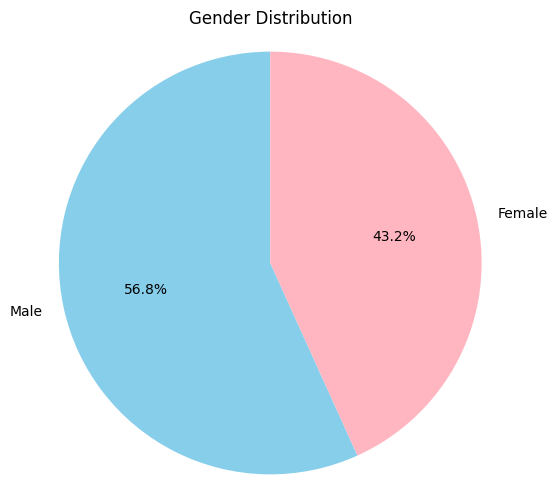

In [13]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

In [14]:
df = df.drop(["CustomerID"], axis=1)

In [15]:
mapping = {
    "Gender": {'Female': 0, 'Male': 1},
    "Subscription Type": {'Basic': 0, 'Standard': 1,'Premium':2},
    "Contract Length": {'Monthly': 0, 'Quarterly': 1,'Annual':2}
    
}

for key, value in mapping.items():
    df[key] = df[key].map(value)

In [16]:
df


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,1,2,932.00,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,0,557.00,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,1,185.00,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,1,0,396.00,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,0,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,2,2,716.38,8.0,0.0
440829,25.0,0,8.0,13.0,1.0,20.0,2,2,745.38,2.0,0.0
440830,26.0,1,35.0,27.0,1.0,5.0,1,1,977.31,9.0,0.0
440831,28.0,1,55.0,14.0,2.0,0.0,1,1,602.55,2.0,0.0


In [17]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [18]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: Churn, Length: 440832, dtype: float64

In [19]:
print(y.value_counts(normalize=True) * 100)


Churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64


In [20]:
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64
Churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64


In [21]:
x_train , x_test , y_train , y_test =train_test_split(x,y, test_size=0.2,random_state=42,stratify=y)

##model = GaussianNB ()

#model.fit(x_train,y_train)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9998638946544626

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[38164     3]
 [    9 49991]]


In [24]:
joblib.dump(clf,"RandomForestClassifier8.pkl")

['RandomForestClassifier8.pkl']

In [25]:
joblib.dump((clf, x.columns), "RandomForestClassifier9.pkl")

['RandomForestClassifier9.pkl']

In [26]:
#x.columns

In [27]:
#y_pred = model.predict(x_test)

In [28]:
#y_pred

In [29]:
#accuracy_score(y_test,y_pred)


In [30]:
#print(classification_report(y_test, y_pred))

In [31]:
#print(confusion_matrix(y_test, y_pred))

In [32]:
#joblib.dump(model,"GaussianNB5.pkl")